In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

In [2]:
def getPsi(U, r, theta, R=40):
    return U*(r-(R**2/r))*math.sin(theta)

In [3]:
def getPsiCylinder(U, x, y, a=40):
    return U*np.sqrt(np.power(x, 2)+np.power(y, 2))*(1-(a**2/(np.power(x, 2) + np.power(y, 2))))*np.sin(np.arctan2(y, x))

In [4]:
np.repeat(np.arange(-100, 101).reshape((1, -1)), 10, axis=0) * 0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
x = np.arange(-100, 101)
y = np.arange(-100, 101)
a = 40

X, Y = np.meshgrid(x, y)

In [6]:
maskedZ = (np.sqrt(np.power(X, 2)+np.power(Y, 2)) >= a) * 1 

In [7]:
maskedZ

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [8]:
X

array([[-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100],
       ...,
       [-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100]])

In [9]:
Y

array([[-100, -100, -100, ..., -100, -100, -100],
       [ -99,  -99,  -99, ...,  -99,  -99,  -99],
       [ -98,  -98,  -98, ...,  -98,  -98,  -98],
       ...,
       [  98,   98,   98, ...,   98,   98,   98],
       [  99,   99,   99, ...,   99,   99,   99],
       [ 100,  100,  100, ...,  100,  100,  100]])

In [10]:
d = 80 # m
u = 1 # m/s
r = 40 # m
dim = 200
Z = getPsiCylinder(u, X, Y)

<ipython-input-3-32f58d246606>:2: RuntimeWarning: divide by zero encountered in true_divide
  return U*np.sqrt(np.power(x, 2)+np.power(y, 2))*(1-(a**2/(np.power(x, 2) + np.power(y, 2))))*np.sin(np.arctan2(y, x))
<ipython-input-3-32f58d246606>:2: RuntimeWarning: invalid value encountered in multiply
  return U*np.sqrt(np.power(x, 2)+np.power(y, 2))*(1-(a**2/(np.power(x, 2) + np.power(y, 2))))*np.sin(np.arctan2(y, x))


In [11]:
Z

array([[-92.        , -91.91960002, -91.83840033, ..., -91.83840033,
        -91.91960002, -92.        ],
       [-91.00040402, -90.91919192, -90.83715537, ..., -90.83715537,
        -90.91919192, -91.00040402],
       [-90.00163232, -89.91960835, -89.83673469, ..., -89.83673469,
        -89.91960835, -90.00163232],
       ...,
       [ 90.00163232,  89.91960835,  89.83673469, ...,  89.83673469,
         89.91960835,  90.00163232],
       [ 91.00040402,  90.91919192,  90.83715537, ...,  90.83715537,
         90.91919192,  91.00040402],
       [ 92.        ,  91.91960002,  91.83840033, ...,  91.83840033,
         91.91960002,  92.        ]])

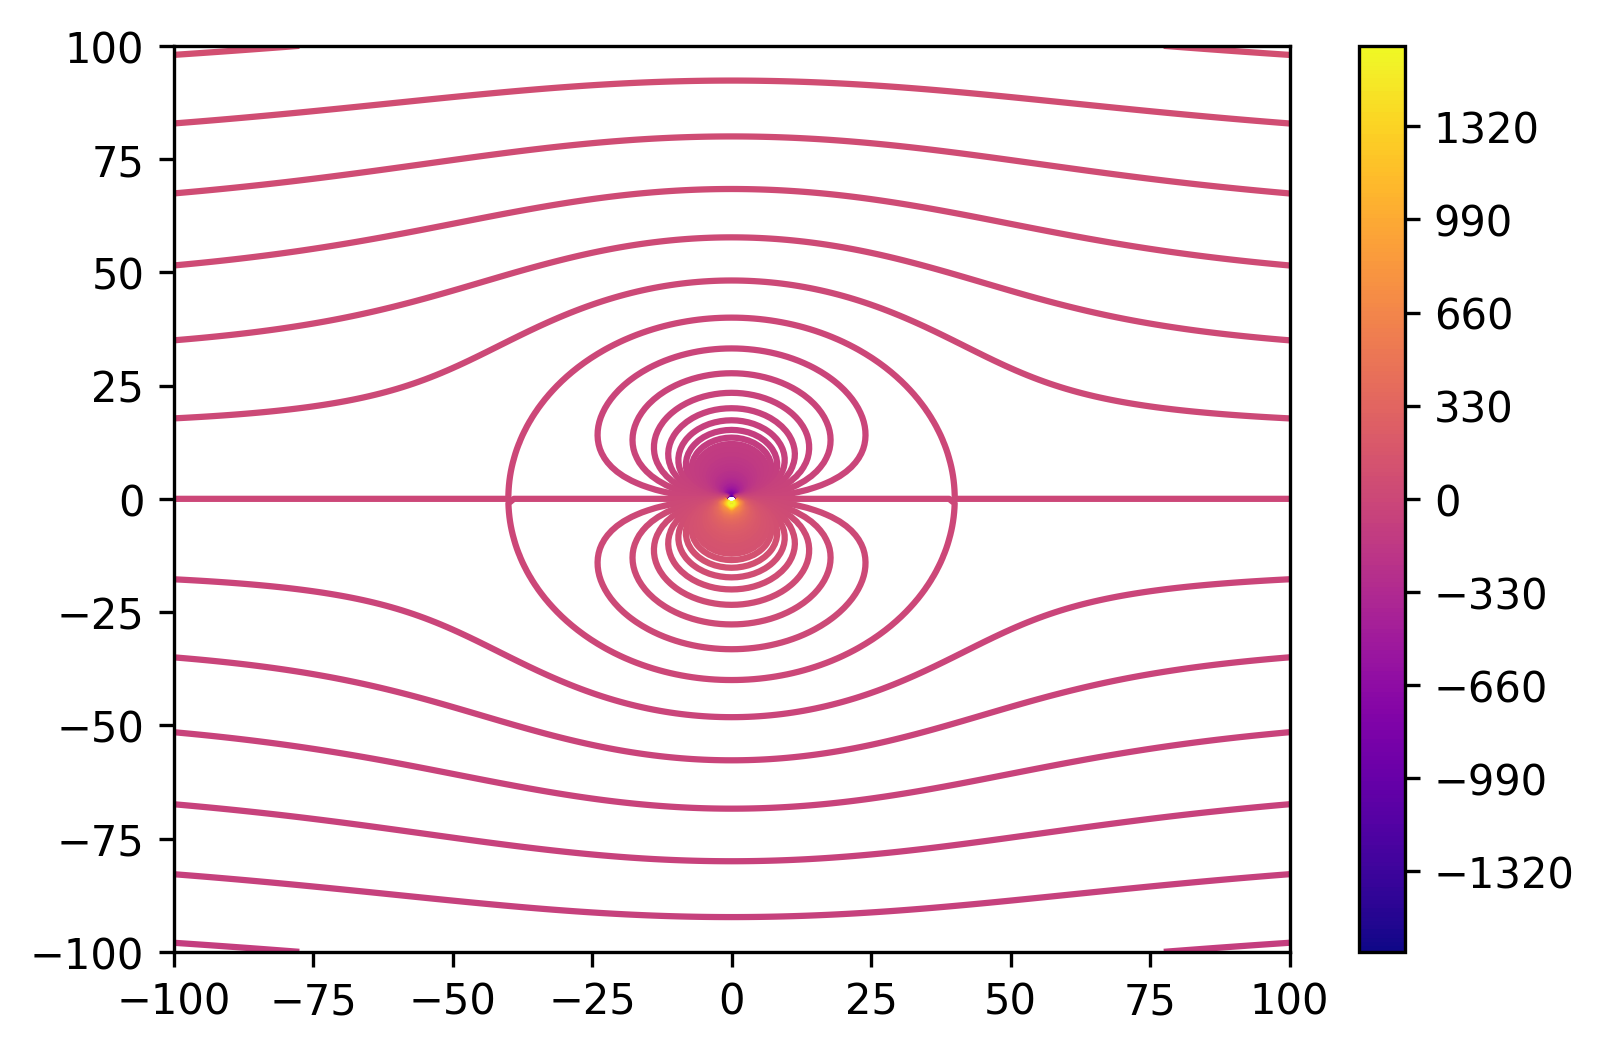

In [12]:
fig, ax = plt.subplots()
ct = plt.contour(X, Y, Z, 250, cmap="plasma")
fig.colorbar(ct)
plt.show()

In [13]:
realZ = (Z * maskedZ)

In [14]:
np.nanmax(realZ)

92.0

In [15]:
np.nanmax(np.gradient(realZ))

1.9523809523809514

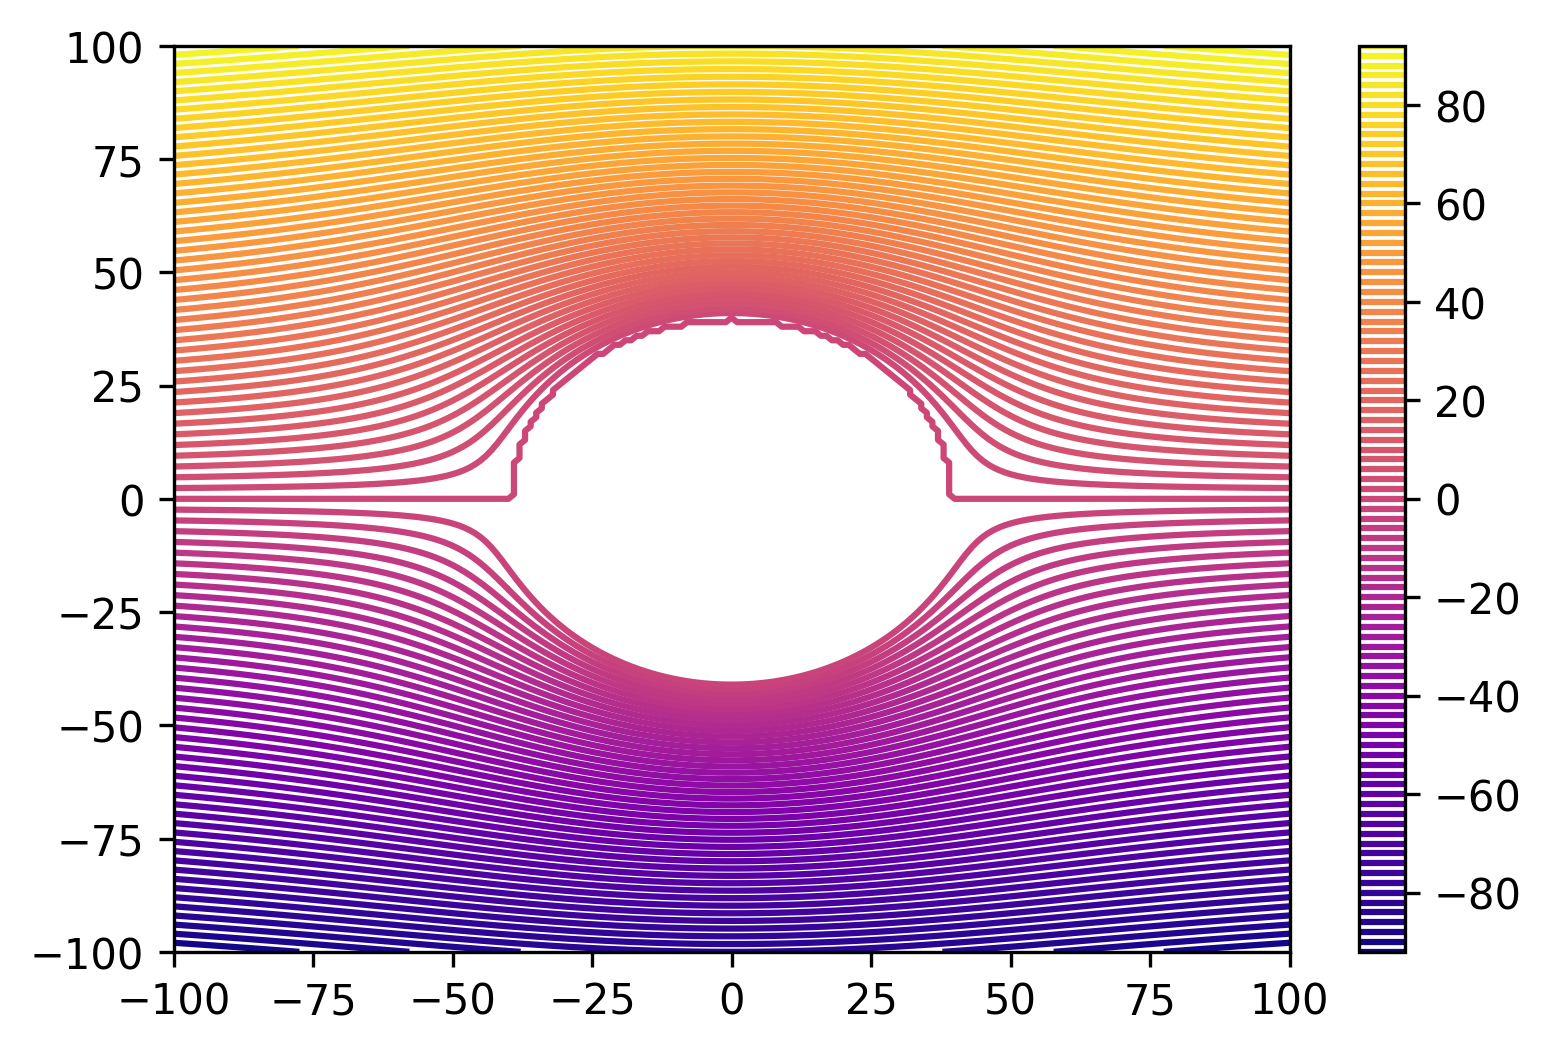

In [16]:
fig, ax = plt.subplots()
ct = plt.contour(X, Y, realZ, 100, cmap="plasma")
fig.colorbar(ct)
plt.show()